# Preprocess

In [1]:
#%run preprocess.ipynb

Arise, arise, Kernels of the motherboard!


/local/data1/simjo484/cond_env/lib/python3.12/site-packages/cmapPy/pandasGEXpress/parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
/local/data1/simjo484/cond_env/lib/python3.12/site-packages/cmapPy/pandasGEXpress/parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))


The first cell has been defeated! Kernel shall be shaken, Cooling fan be splintered,
A second cell has fallen. Let the hope inspire you! Victory awaits!
Another cell tumbles down before our Kernels, defeated! The admins smile upon us on this glorious day!
Victory is within our grasp! Fight so that the algorithms back home may live yet another day!
Onwards! Victory is on the horison!


/tmp/ipykernel_893878/492684487.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(0)


All but one foul cell remains! Slay it!
The cells have fallen! Ride now, ride now! Ride to the next Notebook!


# Train models

In [8]:
#%run train.ipynb

# === Load models ===================================================
model_dir_name = "keras_models"
model_names = ["Linear_MSE", "Linear_Cosine", "NeuNet_simp_MSE", "NeuNet_simp_Cosine", "NeuNet_comp_MSE", "NeuNet_comp_Cosine"]
model_dict = {}

from keras.models import load_model

for model in model_names:
    print(model_dir_name + "/" + model + ".keras")
    model_dict[model] = load_model(model_dir_name + "/" + model + ".keras")

print("\nAll models have been loaded!")
# ===================================================================

keras_models/Linear_MSE.keras
keras_models/Linear_Cosine.keras
keras_models/NeuNet_simp_MSE.keras
keras_models/NeuNet_simp_Cosine.keras
keras_models/NeuNet_comp_MSE.keras
keras_models/NeuNet_comp_Cosine.keras
All models have been loaded


# Evaluate

In [3]:
import matplotlib.pyplot as plt
from tabulate import tabulate

## Make a table of final (training) metrics

In [4]:
[history.history for history in hist_dict.values()][0]

table_values = [[hist.history[metric][0] for metric in global_metric_names] for hist in hist_dict.values()]

print(["Model"] + [i().name for i in global_metrics])
headers = ["Model", "Cosine", "MSE", "MAE", "Huber", "LogCosh"]

print("================== Table below ========================")
print(tabulate(table_values,
               tablefmt="latex",
               headers=headers,
               showindex = [i for i in model_dict.keys()]))

['Model', 'cosine_similarity', 'mean_squared_error', 'mean_absolute_error', 'huber_loss', 'log_cosh']
================== Table below ========================
\begin{tabular}{lrrrrr}
\hline
 Model              &    Cosine &     MSE &      MAE &    Huber &   LogCosh \\
\hline
 Linear\_MSE         & -0.122682 & 2.23879 & 0.932984 & 0.573508 &  0.524489 \\
 Linear\_Cosine      & -0.135108 & 4.26161 & 1.42492  & 1.01339  &  0.927472 \\
 NeuNet\_simp\_MSE    & -0.126781 & 2.22769 & 0.934866 & 0.574278 &  0.524901 \\
 NeuNet\_simp\_Cosine & -0.138649 & 2.85246 & 1.14833  & 0.757326 &  0.688791 \\
 NeuNet\_comp\_MSE    & -0.124389 & 2.22911 & 0.934212 & 0.573906 &  0.524627 \\
 NeuNet\_comp\_Cosine & -0.139939 & 2.27987 & 0.936648 & 0.578721 &  0.529617 \\
\hline
\end{tabular}


## Make a table of validation metrics

In [41]:
# Evaluate on validation data
import numpy as np
row_values = []

for model in model_dict:
    metrics = model_dict[model].evaluate(X_valid, y_valid)
    row_values.append([model] + metrics[1:]) #first value in metrics is loss, the following are the metrics (Cosie, mse, etc)

headers = ["Model", "Cosine", "MSE", "MAE", "Huber", "LogCosh"]

print("================== Table below ========================")
print(tabulate(row_values,
               tablefmt="github",
               headers=headers))

8004/8004 ━━━━━━━━━━━━━━━━━━━━ 5s 595us/step - cosine_similarity: -0.1378 - huber_loss: 0.5777 - log_cosh: 0.5275 - loss: 2.2173 - mean_absolute_error: 0.9412 - mean_squared_error: 2.2173
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 5s 590us/step - cosine_similarity: -0.1548 - huber_loss: 0.5760 - log_cosh: 0.5267 - loss: -0.1548 - mean_absolute_error: 0.9358 - mean_squared_error: 2.2497
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 7s 931us/step - cosine_similarity: -0.1495 - huber_loss: 0.5783 - log_cosh: 0.5277 - loss: 2.2059 - mean_absolute_error: 0.9427 - mean_squared_error: 2.2059
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 8s 945us/step - cosine_similarity: -0.1666 - huber_loss: 0.5662 - log_cosh: 0.5188 - loss: -0.1666 - mean_absolute_error: 0.9209 - mean_squared_error: 2.2887
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - cosine_similarity: -0.1506 - huber_loss: 0.5781 - log_cosh: 0.5275 - loss: 2.2048 - mean_absolute_error: 0.9425 - mean_squared_error: 2.2048
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - cosine_similari

## Make a table of min and max values

In [42]:
import numpy as np
row_values = []

for model in model_dict:
    train_preds = model_dict[model].predict(X_train)

    valid_preds = model_dict[model].predict(X_valid)

    
    row_values.append([model,
                       float(np.min(train_preds)),
                       float(np.max(train_preds)),

                       float(np.min(valid_preds)),
                       float(np.max(valid_preds))
                      ])

headers = ["Model",
           "Train pred min",
           "Train pred max", 
           "Valid pred min", 
           "Valid pred max"]

print("================== Table below ========================")
print(tabulate(row_values,
               tablefmt="github",
               headers=headers))

37349/37349 ━━━━━━━━━━━━━━━━━━━━ 9s 249us/step
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 2s 216us/step
37349/37349 ━━━━━━━━━━━━━━━━━━━━ 9s 239us/step
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 2s 229us/step
37349/37349 ━━━━━━━━━━━━━━━━━━━━ 26s 690us/step
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 5s 675us/step
37349/37349 ━━━━━━━━━━━━━━━━━━━━ 26s 684us/step
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 5s 684us/step
37349/37349 ━━━━━━━━━━━━━━━━━━━━ 27s 727us/step
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 6s 732us/step
37349/37349 ━━━━━━━━━━━━━━━━━━━━ 28s 742us/step
8004/8004 ━━━━━━━━━━━━━━━━━━━━ 6s 742us/step
================== Table below ========================
| Model              |   Train pred min |   Train pred max |   Valid pred min |   Valid pred max |
|--------------------|------------------|------------------|------------------|------------------|
| Linear_MSE         |         -6.42612 |         10.2857  |         -6.42612 |         10.2857  |
| Linear_Cosine      |        -15.8652  |         14.1729  |        -15.8652  |         14.

## Make a plot of losses

In [9]:
[i().name for i in global_metrics]

['cosine_similarity',
 'mean_squared_error',
 'mean_absolute_error',
 'huber_loss',
 'log_cosh']

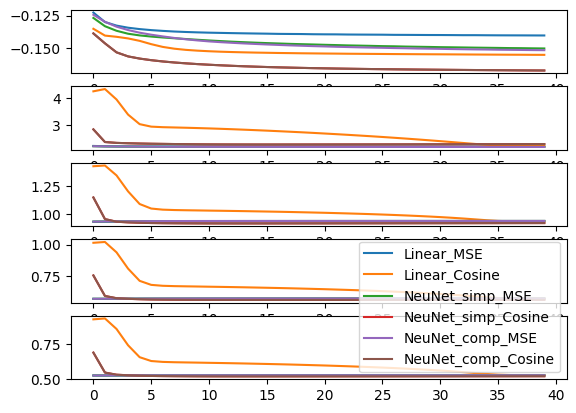

In [27]:
#hist_dict["Linear_MSE"].history

fig, axs = plt.subplots(nrows=5)
axs[0].plot(hist_dict["Linear_MSE"].history["cosine_similarity"])
axs[0].plot(hist_dict["Linear_Cosine"].history["cosine_similarity"])
axs[0].plot(hist_dict["NeuNet_simp_MSE"].history["cosine_similarity"])
axs[0].plot(hist_dict["NeuNet_simp_Cosine"].history["cosine_similarity"])
axs[0].plot(hist_dict["NeuNet_comp_MSE"].history["cosine_similarity"])
axs[0].plot(hist_dict["NeuNet_simp_Cosine"].history["cosine_similarity"])
#axs[0].legend([i for i in model_dict.keys()])

axs[1].plot(hist_dict["Linear_MSE"].history["mean_squared_error"])
axs[1].plot(hist_dict["Linear_Cosine"].history["mean_squared_error"])
axs[1].plot(hist_dict["NeuNet_simp_MSE"].history["mean_squared_error"])
axs[1].plot(hist_dict["NeuNet_simp_Cosine"].history["mean_squared_error"])
axs[1].plot(hist_dict["NeuNet_comp_MSE"].history["mean_squared_error"])
axs[1].plot(hist_dict["NeuNet_simp_Cosine"].history["mean_squared_error"])

axs[2].plot(hist_dict["Linear_MSE"].history["mean_absolute_error"])
axs[2].plot(hist_dict["Linear_Cosine"].history["mean_absolute_error"])
axs[2].plot(hist_dict["NeuNet_simp_MSE"].history["mean_absolute_error"])
axs[2].plot(hist_dict["NeuNet_simp_Cosine"].history["mean_absolute_error"])
axs[2].plot(hist_dict["NeuNet_comp_MSE"].history["mean_absolute_error"])
axs[2].plot(hist_dict["NeuNet_simp_Cosine"].history["mean_absolute_error"])

axs[3].plot(hist_dict["Linear_MSE"].history["huber_loss"])
axs[3].plot(hist_dict["Linear_Cosine"].history["huber_loss"])
axs[3].plot(hist_dict["NeuNet_simp_MSE"].history["huber_loss"])
axs[3].plot(hist_dict["NeuNet_simp_Cosine"].history["huber_loss"])
axs[3].plot(hist_dict["NeuNet_comp_MSE"].history["huber_loss"])
axs[3].plot(hist_dict["NeuNet_simp_Cosine"].history["huber_loss"])

axs[4].plot(hist_dict["Linear_MSE"].history["log_cosh"])
axs[4].plot(hist_dict["Linear_Cosine"].history["log_cosh"])
axs[4].plot(hist_dict["NeuNet_simp_MSE"].history["log_cosh"])
axs[4].plot(hist_dict["NeuNet_simp_Cosine"].history["log_cosh"])
axs[4].plot(hist_dict["NeuNet_comp_MSE"].history["log_cosh"])
axs[4].plot(hist_dict["NeuNet_simp_Cosine"].history["log_cosh"])

axs[4].legend([i for i in model_dict.keys()])